In [ ]:
#Example 1
#Without getting into details of the science itself, do you think a liner regression is a proper way to analyze this data set? Are the data linear? 
#Why or why not? If not, how does that weaken any interpretation of the data?
##I think linear regression is a proper way to analyze this data given tht the meausres are independent from one another, there is linearity, and no extreme outliers

#Can one make any sort of inference about casualty from this finding? What are the weaknesses and strengths of such a study and set of findings?
##No one cannot make an inference on casualty based on a correlation. Correlation does not equal causation! The strength of this stidy is that you get to observe a new
#observation about two independent variables. However, the weakness is that you can't determine if more experinece being a cab driver leads to a larger hippocampus, or if having a bigger hippocampus leads to better memory and more years a a taxi driver. 

#Exmaple 2
#What do you think of their n? How strong of a claim do you think they can make with their regression based on their n? 
##I think their N value is small and not sufficient to make strong calims. A larger N is needed to increase power. 

#What would their confidence intervals look like? I
##Confidence intervals would most likely be wide to refelct the uncertainty of results given the small N vale. 

# In each plot, there are 2 regression lines. In theory, can you think of a way to decide if the two regression lines are the same or not? What would be your H0?
##I would calculate the slope of both regression lines and compare them. The null hypothesis would be that the slope of both regression lines is the same, there is no difference between them. 

#1. Plot the relationship between Age and Wing Length.
#2. Calculate and plot the regression line.
#3. Can you reject ?
#4. Calculate and plot the confidence intervals on the slope of the regression.
#5. Calculate (the coefficient of determination)
#6. Calculate Pearson's r.
#7. Add some noise to the data and see how the regression changes.


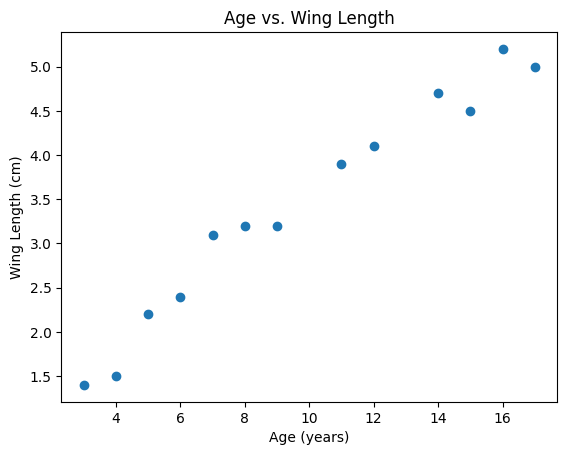

In [3]:
#1. Plot the relationship between Age and Wing Length.

import matplotlib.pyplot as plt
import numpy as np

age = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
wing_length = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

plt.scatter(age, wing_length)
plt.title("Age vs. Wing Length")
plt.xlabel("Age (years)")
plt.ylabel("Wing Length (cm)")
plt.show()


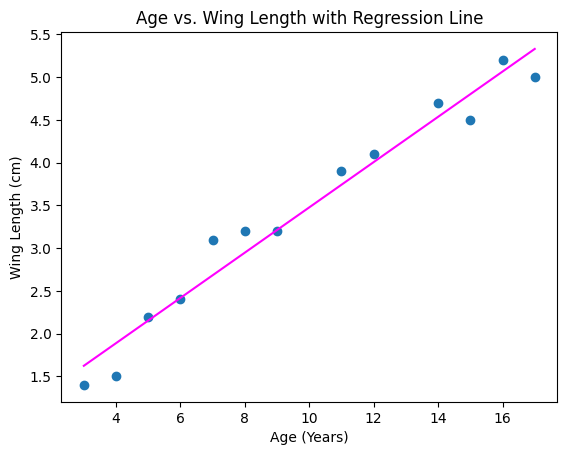

In [36]:
#2. Calculate and plot the regression line.

slope, intercept = np.polyfit(age, wing_length, 1)

plt.scatter(age, wing_length)
plt.plot(age, np.array(age) * slope + intercept, color='magenta')
plt.title("Age vs. Wing Length with Regression Line")
plt.xlabel("Age (Years)")
plt.ylabel("Wing Length (cm)")
plt.show()


In [24]:
#3. Can you reject ?
#t test to test the null hypothesis

import numpy as np
from scipy import stats

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Calculate means
mean_x = np.mean(age)
mean_y = np.mean(wing_length)

# Calculate slope (b1) and intercept (b0)
b1_numerator = np.sum((age - mean_x) * (wing_length - mean_y))
b1_denominator = np.sum((age - mean_x)**2)
b1 = b1_numerator / b1_denominator
b0 = mean_y - b1 * mean_x

# Predicted values
y_pred = b0 + b1 * age

# Residuals
residuals = wing_length - y_pred

# Calculate standard error of the regression
SSE = np.sum(residuals**2)  # Sum of squared errors
n = len(age)
SE = np.sqrt(SSE / (n - 2))  # Standard error of the estimate

# Standard error of the slope
SE_b1 = SE / np.sqrt(np.sum((age - mean_x)**2))

# Calculate t-statistic for the slope
t_statistic = b1 / SE_b1

# Calculate p-value for the t-statistic
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n-2))

# Output results
print(f"Slope (b1): {b1:.4f}")
print(f"Intercept (b0): {b0:.4f}")
print(f"Standard Error of the slope (SE): {SE_b1:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Determine if H₀ can be rejected
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H₀): There is a significant linear relationship.")
else:
    print("Fail to reject the null hypothesis (H₀): No significant linear relationship.")


Slope (b1): 0.2647
Intercept (b0): 0.8296
Standard Error of the slope (SE): 0.0156
T-statistic: 17.0118
P-value: 0.0000
Reject the null hypothesis (H₀): There is a significant linear relationship.


Slope (b1): 0.2647
95% Confidence Interval for the slope: (0.2304, 0.2989)


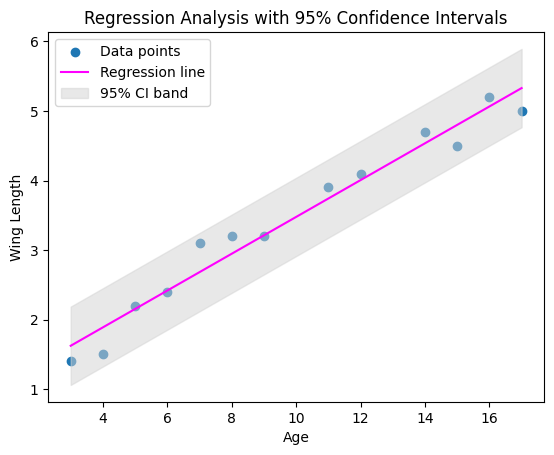

In [37]:
#4. Calculate and plot the confidence intervals on the slope of the regression.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate means
mean_x = np.mean(age)
mean_y = np.mean(wing_length)

# Calculate slope (b1) and intercept (b0)
b1_numerator = np.sum((age - mean_x) * (wing_length - mean_y))
b1_denominator = np.sum((age - mean_x)**2)
b1 = b1_numerator / b1_denominator
b0 = mean_y - b1 * mean_x

# Predicted values
y_pred = b0 + b1 * age

# Residuals
residuals = wing_length - y_pred

# Calculate standard error of the regression
SSE = np.sum(residuals**2)
n = len(age)
SE = np.sqrt(SSE / (n - 2))

# Standard error of the slope
SE_b1 = SE / np.sqrt(np.sum((age - mean_x)**2))

# Calculate t-statistic for 95% confidence interval
t_value = stats.t.ppf(0.975, df=n-2)  # Two-tailed test for 95% CI

# Confidence intervals for the slope
CI_lower = b1 - t_value * SE_b1
CI_upper = b1 + t_value * SE_b1

# Output results
print(f"Slope (b1): {b1:.4f}")
print(f"95% Confidence Interval for the slope: ({CI_lower:.4f}, {CI_upper:.4f})")

# Plotting
plt.scatter(age, wing_length, label='Data points')
plt.plot(age, y_pred, color='magenta', label='Regression line')
plt.fill_between(age, y_pred - t_value * SE, y_pred + t_value * SE, color='lightgrey', alpha=0.5, label='95% CI band')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.title('Regression Analysis with 95% Confidence Intervals')
plt.show()


In [27]:
#4. Calculate r^2 (the coefficient of determination)

# Calculate means
mean_y = np.mean(wing_length)

# Predicted values (using the previously calculated slope and intercept)
b1_numerator = np.sum((age - np.mean(age)) * (wing_length - mean_y))
b1_denominator = np.sum((age - np.mean(age))**2)
b1 = b1_numerator / b1_denominator
b0 = mean_y - b1 * np.mean(age)
y_pred = b0 + b1 * age

# Total Sum of Squares (SST)
SST = np.sum((wing_length - mean_y)**2)

# Residual Sum of Squares (SSR)
SSR = np.sum((wing_length - y_pred)**2)

# Coefficient of Determination (R²)
R_squared = 1 - (SSR / SST)

# Output result
print(f"Coefficient of Determination (R²): {R_squared:.4f}")


Coefficient of Determination (R²): 0.9634


In [28]:
#6. Calculate Pearson's r.

from scipy.stats import pearsonr

r, _ = pearsonr(age, wing_length)
print("Pearson's r:", r)


Pearson's r: 0.9815203776816283


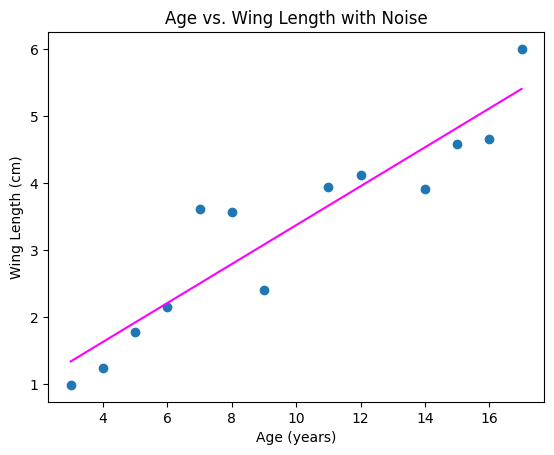

In [38]:
#7. Add some noise to the data and see how the regression changes.

np.random.seed(65)  
noise = np.random.normal(0, 0.5, size=len(wing_length)) 
wing_length_noisy = np.array(wing_length) + noise

# Plotting with noise
plt.scatter(age, wing_length_noisy)
slope_noisy, intercept_noisy = np.polyfit(age, wing_length_noisy, 1)
plt.plot(age, np.array(age) * slope_noisy + intercept_noisy, color='magenta')
plt.title("Age vs. Wing Length with Noise")
plt.xlabel("Age (years)")
plt.ylabel("Wing Length (cm)")
plt.show()